In [76]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [97]:
import_data = nfl.import_weekly_data([2022])             
qb_data = pd.DataFrame(index = import_data.index)
#qb_data["Player"] = import_data["player_name"]
qb_data["Team"] = import_data["recent_team"]
qb_data["Position"] = import_data["position"]
qb_data["Week"] = import_data["week"]
qb_data["Completions"] = import_data["completions"]
qb_data["Attempts"] = import_data["attempts"]
qb_data["Passing Yards"] = import_data["passing_yards"]
qb_data["Passing TDs"] = import_data["passing_tds"]
qb_data["Interceptions"] = import_data["interceptions"]
qb_data["Sacked"] = import_data["sacks"]
qb_data["Sack Yards"] = import_data["sack_yards"]
qb_data["Sack Fumbles"] = import_data["sack_fumbles"]
qb_data["Sack Fumbles Lost"] = import_data["sack_fumbles_lost"]
qb_data["Air Yards"] = import_data["passing_air_yards"]
qb_data["Passing YAC"] = import_data["passing_yards_after_catch"]
qb_data["Passing First Downs"] = import_data["passing_first_downs"]
qb_data["Passing EPA"] = import_data["passing_epa"]
qb_data["2Pt Conversions"] = import_data["passing_2pt_conversions"]
qb_data["PACR"] = import_data["pacr"]
qb_data = qb_data.loc[(qb_data["Attempts"] > 13) & (qb_data["Week"] == 1), :]
qb_data = qb_data.sort_values(by=['Team'])
qb_data.loc[qb_data["Team"] == "LA", "Team"] = "LAR"
qb_data

Downcasting floats.


,Team,Position,Week,Completions,Attempts,Passing Yards,Passing TDs,Interceptions,Sacked,Sack Yards,Sack Fumbles,Sack Fumbles Lost,Air Yards,Passing YAC,Passing First Downs,Passing EPA,2Pt Conversions,PACR
180,ARI,QB,1,22,34,193.0,2,0.0,2.0,18.0,0,0,250.0,111.0,11.0,0.245661,1,0.772000
57,ATL,QB,1,20,33,215.0,0,0.0,0.0,-0.0,0,0,282.0,78.0,8.0,5.021303,0,0.762411
155,BAL,QB,1,17,30,213.0,3,1.0,2.0,2.0,0,0,360.0,66.0,8.0,4.237769,0,0.591667
164,BUF,QB,1,26,31,297.0,3,2.0,2.0,5.0,0,0,227.0,114.0,15.0,13.646458,0,1.308370
163,CAR,QB,1,16,27,235.0,1,1.0,4.0,28.0,2,0,167.0,149.0,7.0,-1.618550,0,1.407186
279,CHI,QB,1,8,17,121.0,2,1.0,2.0,16.0,0,0,162.0,67.0,4.0,-1.695690,0,0.746914
249,CIN,QB,1,33,53,338.0,2,4.0,7.0,39.0,2,1,357.0,192.0,22.0,-17.178366,1,0.946779
79,CLE,QB,1,18,34,147.0,1,0.0,1.0,9.0,0,0,248.0,57.0,7.0,-7.346917,0,0.592742
73,DAL,QB,1,14,29,134.0,0,1.0,2.0,13.0,0,0,202.0,56.0,6.0,-12.482924,0,0.663366
10,DEN,QB,1,29,42,340.0,1,0.0,2.0,10.0,0,0,275.0,230.0,13.0,15.161885,0,1.236364


In [98]:
qb_data_ngs = pd.read_csv("Resources/ngs_2022_passing.csv")
qb_data_ngs = qb_data_ngs.loc[qb_data_ngs["week"] == 1, :]
qb_data_ngs = qb_data_ngs.sort_values(by=['team_abbr'])
qb_data_full = qb_data_ngs.merge(qb_data, left_on='team_abbr', right_on='Team')
qb_data_full.columns

Index(['season', 'season_type', 'week', 'player_display_name',
       'player_position', 'team_abbr', 'avg_time_to_throw',
       'avg_completed_air_yards', 'avg_intended_air_yards',
       'avg_air_yards_differential', 'aggressiveness',
       'max_completed_air_distance', 'avg_air_yards_to_sticks', 'attempts',
       'pass_yards', 'pass_touchdowns', 'interceptions', 'passer_rating',
       'completions', 'completion_percentage',
       'expected_completion_percentage',
       'completion_percentage_above_expectation', 'avg_air_distance',
       'max_air_distance', 'player_gsis_id', 'player_first_name',
       'player_last_name', 'player_jersey_number', 'player_short_name', 'Team',
       'Position', 'Week', 'Completions', 'Attempts', 'Passing Yards',
       'Passing TDs', 'Interceptions', 'Sacked', 'Sack Yards', 'Sack Fumbles',
       'Sack Fumbles Lost', 'Air Yards', 'Passing YAC', 'Passing First Downs',
       'Passing EPA', '2Pt Conversions', 'PACR'],
      dtype='object')

In [147]:
qb_data_full

,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,...,Sacked,Sack Yards,Sack Fumbles,Sack Fumbles Lost,Air Yards,Passing YAC,Passing First Downs,Passing EPA,2Pt Conversions,PACR
0,2022,REG,1,Kyler Murray,QB,ARI,2.803059,3.766818,7.508125,-3.741307,...,2.0,18.0,0,0,250.0,111.0,11.0,0.245661,1,0.772000
1,2022,REG,1,Marcus Mariota,QB,ATL,2.960281,6.670500,8.687812,-2.017312,...,0.0,-0.0,0,0,282.0,78.0,8.0,5.021303,0,0.762411
2,2022,REG,1,Lamar Jackson,QB,BAL,3.008267,8.862353,12.205517,-3.343164,...,2.0,2.0,0,0,360.0,66.0,8.0,4.237769,0,0.591667
3,2022,REG,1,Josh Allen,QB,BUF,2.474419,6.690385,7.107419,-0.417035,...,2.0,5.0,0,0,227.0,114.0,15.0,13.646458,0,1.308370
4,2022,REG,1,Baker Mayfield,QB,CAR,2.512815,5.314375,6.705200,-1.390825,...,4.0,28.0,2,0,167.0,149.0,7.0,-1.618550,0,1.407186
5,2022,REG,1,Justin Fields,QB,CHI,3.274647,6.355000,9.997647,-3.642647,...,2.0,16.0,0,0,162.0,67.0,4.0,-1.695690,0,0.746914
6,2022,REG,1,Joe Burrow,QB,CIN,2.700208,4.982121,7.603585,-2.621464,...,7.0,39.0,2,1,357.0,192.0,22.0,-17.178366,1,0.946779
7,2022,REG,1,Jacoby Brissett,QB,CLE,2.973875,4.793333,7.666333,-2.873000,...,1.0,9.0,0,0,248.0,57.0,7.0,-7.346917,0,0.592742
8,2022,REG,1,Dak Prescott,QB,DAL,2.720966,5.637143,7.434828,-1.797685,...,2.0,13.0,0,0,202.0,56.0,6.0,-12.482924,0,0.663366
9,2022,REG,1,Russell Wilson,QB,DEN,3.036286,3.657241,7.274146,-3.616905,...,2.0,10.0,0,0,275.0,230.0,13.0,15.161885,0,1.236364


In [101]:
team_color = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LAR':'#002147','LAC':'#2072BA',
          'MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C','NYJ':'#203731',
          'LV':'#C4C9CC','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

In [93]:
urls = pd.read_csv('https://raw.githubusercontent.com/statsbylopez/BlogPosts/master/nfl_teamlogos.csv')
for i in range(0,len(urls)):
    urllib.request.urlretrieve(urls['url'].iloc[i], os.getcwd() + '//Team_Logos' + urls['team'].iloc[i] + '.png')

In [79]:
def getImage(path): 
    return OffsetImage(plt.imread(path), zoom=.5)

In [123]:
logos = os.listdir(os.getcwd() + '/Team_Logos')
logos.sort()
logo_paths = []

for i in logos:
    if (str(i) != ".DS_Store"):
      logo_paths.append(os.getcwd() + '/Team_Logos/' + str(i))  

In [124]:
logo_paths

['/Users/vishaalgupta/Desktop/NFL Data/Team_Logos/ARI.png',
 '/Users/vishaalgupta/Desktop/NFL Data/Team_Logos/ATL.png',
 '/Users/vishaalgupta/Desktop/NFL Data/Team_Logos/BAL.png',
 '/Users/vishaalgupta/Desktop/NFL Data/Team_Logos/BUF.png',
 '/Users/vishaalgupta/Desktop/NFL Data/Team_Logos/CAR.png',
 '/Users/vishaalgupta/Desktop/NFL Data/Team_Logos/CHI.png',
 '/Users/vishaalgupta/Desktop/NFL Data/Team_Logos/CIN.png',
 '/Users/vishaalgupta/Desktop/NFL Data/Team_Logos/CLE.png',
 '/Users/vishaalgupta/Desktop/NFL Data/Team_Logos/DAL.png',
 '/Users/vishaalgupta/Desktop/NFL Data/Team_Logos/DEN.png',
 '/Users/vishaalgupta/Desktop/NFL Data/Team_Logos/DET.png',
 '/Users/vishaalgupta/Desktop/NFL Data/Team_Logos/GB.png',
 '/Users/vishaalgupta/Desktop/NFL Data/Team_Logos/HOU.png',
 '/Users/vishaalgupta/Desktop/NFL Data/Team_Logos/IND.png',
 '/Users/vishaalgupta/Desktop/NFL Data/Team_Logos/JAX.png',
 '/Users/vishaalgupta/Desktop/NFL Data/Team_Logos/KC.png',
 '/Users/vishaalgupta/Desktop/NFL Data/Tea

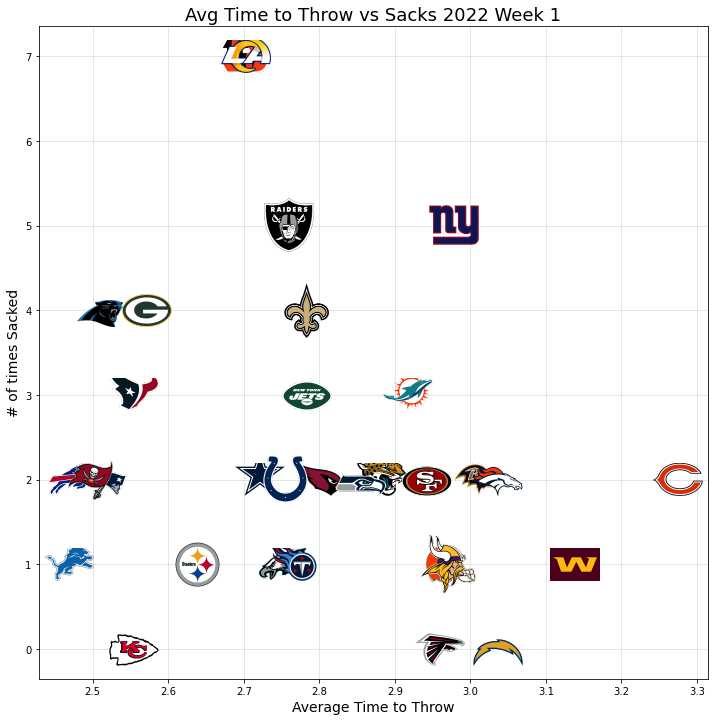

In [129]:
avg_time_to_throw = qb_data_full[["player_short_name", "avg_time_to_throw", "Sacked", "team_abbr"]]

x = avg_time_to_throw["avg_time_to_throw"]
y = avg_time_to_throw["Sacked"]
color = []

for team in avg_time_to_throw["team_abbr"]:
    color.append(team_color[team])

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
#plt.scatter(x, y, c = color)
plt.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Average Time to Throw', fontsize=14)
plt.ylabel('# of times Sacked', fontsize=14)
plt.title('Avg Time to Throw vs Sacks 2022 Week 1', fontsize=18)

#Add player names to points
#for i, txt in enumerate(avg_time_to_throw["player_short_name"]):
#    plt.annotate(txt, (x[i], y[i]))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

plt.show()

#Save the figure as a png
#plt.savefig('team_epas.png', dpi=400)

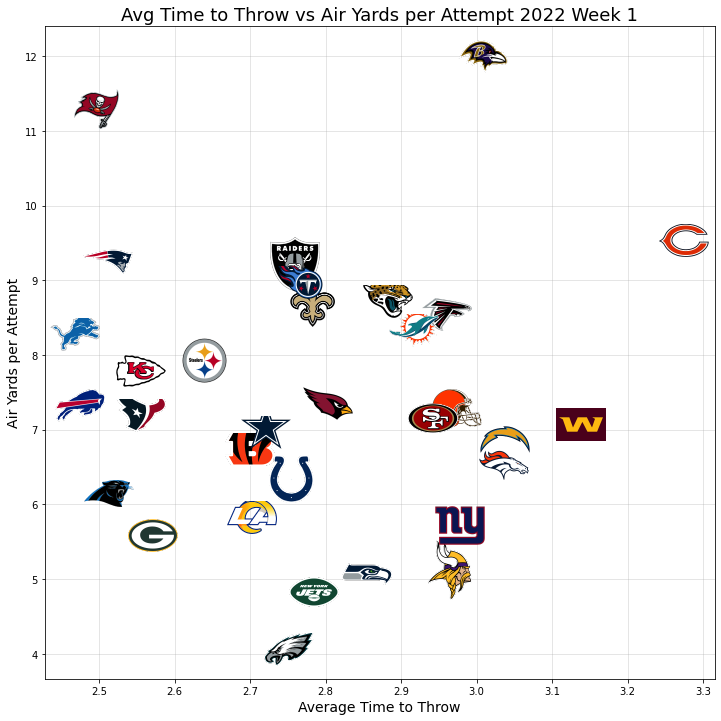

In [137]:
avg_time_to_throw = qb_data_full[["player_short_name", "avg_time_to_throw", "Air Yards", "Attempts", "team_abbr"]]

x = avg_time_to_throw["avg_time_to_throw"]
y = avg_time_to_throw["Air Yards"]/avg_time_to_throw["Attempts"]
color = []

for team in avg_time_to_throw["team_abbr"]:
    color.append(team_color[team])

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
#plt.scatter(x, y, c = color)
plt.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Average Time to Throw', fontsize=14)
plt.ylabel('Air Yards per Attempt', fontsize=14)
plt.title('Avg Time to Throw vs Air Yards per Attempt 2022 Week 1', fontsize=18)

#Add player names to points
#for i, txt in enumerate(avg_time_to_throw["player_short_name"]):
#    plt.annotate(txt, (x[i], y[i]))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

plt.show()

#Save the figure as a png
#plt.savefig('team_epas.png', dpi=400)

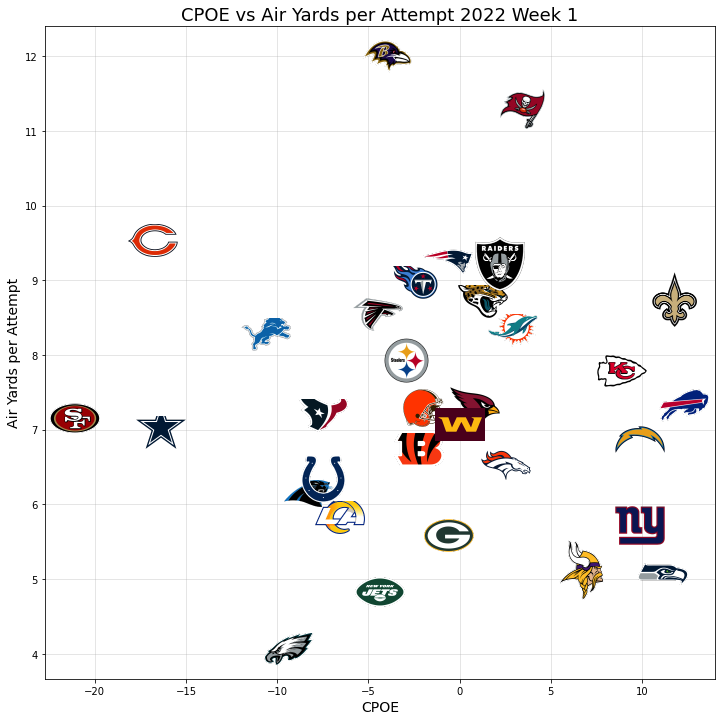

In [139]:
avg_time_to_throw = qb_data_full[["player_short_name", "completion_percentage_above_expectation", "Air Yards", "Attempts", "team_abbr"]]

x = avg_time_to_throw["completion_percentage_above_expectation"]
y = avg_time_to_throw["Air Yards"]/avg_time_to_throw["Attempts"]
color = []

for team in avg_time_to_throw["team_abbr"]:
    color.append(team_color[team])

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
#plt.scatter(x, y, c = color)
plt.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('CPOE', fontsize=14)
plt.ylabel('Air Yards per Attempt', fontsize=14)
plt.title('CPOE vs Air Yards per Attempt 2022 Week 1', fontsize=18)

#Add player names to points
#for i, txt in enumerate(avg_time_to_throw["player_short_name"]):
#    plt.annotate(txt, (x[i], y[i]))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

plt.show()

#Save the figure as a png
#plt.savefig('team_epas.png', dpi=400)

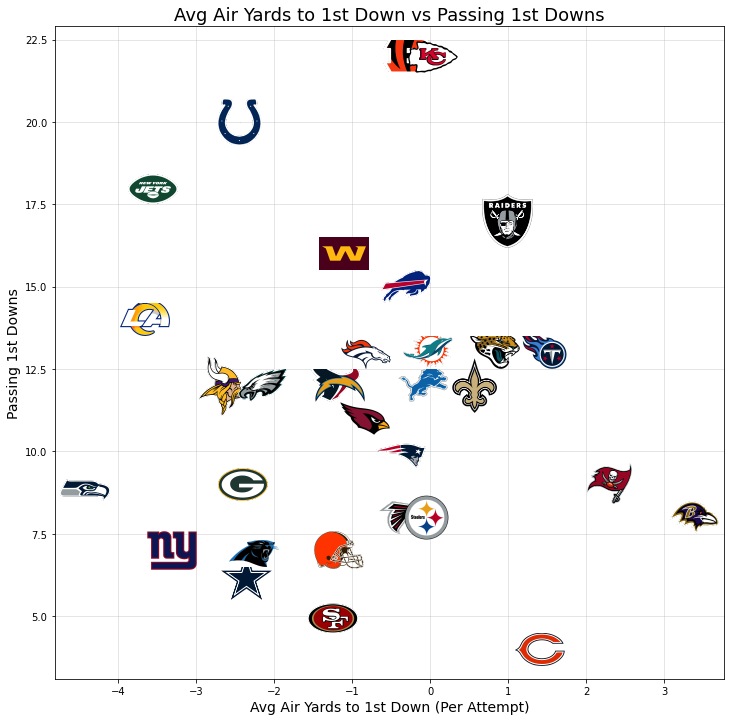

In [143]:
avg_time_to_throw = qb_data_full[["player_short_name", "avg_air_yards_to_sticks", "Passing First Downs", "team_abbr"]]

x = avg_time_to_throw["avg_air_yards_to_sticks"]
y = avg_time_to_throw["Passing First Downs"]
color = []

for team in avg_time_to_throw["team_abbr"]:
    color.append(team_color[team])

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
#plt.scatter(x, y, c = color)
plt.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Avg Air Yards to 1st Down (Per Attempt)', fontsize=14)
plt.ylabel('Passing 1st Downs', fontsize=14)
plt.title('Avg Air Yards to 1st Down vs Passing 1st Downs', fontsize=18)

#Add player names to points
#for i, txt in enumerate(avg_time_to_throw["player_short_name"]):
#    plt.annotate(txt, (x[i], y[i]))
    
#plt.figtext(.78, .06, 'Data from nflscrapR', fontsize=10)
#plt.xlim(2.45, 3.3)
#plt.ylim(0, 7)

plt.show()

#Save the figure as a png
#plt.savefig('team_epas.png', dpi=400)

In [4]:
import_data = nfl.import_weekly_data([2022])             
rb_data = pd.DataFrame(index = import_data.index)
rb_data["Player"] = import_data["player_name"]
rb_data["Team"] = import_data["recent_team"]
rb_data["Position"] = import_data["position"]
rb_data["Week"] = import_data["week"]
rb_data["Carries"] = import_data["carries"]
rb_data["Rushing Yards"] = import_data["rushing_yards"]
rb_data["Rushing TDs"] = import_data["rushing_tds"]
rb_data["Fumbles"] = import_data["rushing_fumbles"]
rb_data["Fumbles Lost"] = import_data["rushing_fumbles_lost"]
rb_data["Rushing 1st Downs"] = import_data["rushing_first_downs"]
rb_data["Rushing EPA"] = import_data["rushing_epa"]
rb_data["Rushing 2Pt Conversions"] = import_data["rushing_2pt_conversions"]
rb_data = rb_data.loc[(rb_data["Carries"] > 0) & (rb_data["Week"] == 1), :]
rb_data = rb_data.sort_values(by=['Team'])
rb_data

Downcasting floats.


,Player,Team,Position,Week,Carries,Rushing Yards,Rushing TDs,Fumbles,Fumbles Lost,Rushing 1st Downs,Rushing EPA,Rushing 2Pt Conversions
242,E.Benjamin,ARI,RB,1,4,28.0,0,0.0,0.0,1.0,1.191036,0
96,J.Conner,ARI,RB,1,10,26.0,1,1.0,0.0,3.0,-0.850391,0
175,T.McSorley,ARI,QB,1,3,20.0,0,0.0,0.0,1.0,0.745036,0
180,K.Murray,ARI,QB,1,5,29.0,0,1.0,0.0,1.0,0.523658,0
280,A.Williams,ATL,RB,1,2,7.0,0,0.0,0.0,0.0,-0.228459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
63,J.McKissic,WAS,RB,1,3,8.0,0,0.0,0.0,1.0,-0.989754,0
69,C.Wentz,WAS,QB,1,6,12.0,0,0.0,0.0,0.0,0.314388,0
233,A.Gibson,WAS,RB,1,14,58.0,0,0.0,0.0,5.0,0.406072,0
308,J.Dotson,WAS,WR,1,1,-10.0,0,0.0,0.0,0.0,-1.455014,0


In [5]:
import_data = nfl.import_weekly_data([2022])             
wr_data = pd.DataFrame(index = import_data.index)
wr_data["Player"] = import_data["player_name"]
wr_data["Team"] = import_data["recent_team"]
wr_data["Position"] = import_data["position"]
wr_data["Week"] = import_data["week"]
wr_data["Receptions"] = import_data["receptions"]
wr_data["Targets"] = import_data["targets"]
wr_data["Receiving Yards"] = import_data["receiving_yards"]
wr_data["Receiving TDs"] = import_data["receiving_tds"]
wr_data["Fumbles"] = import_data["receiving_fumbles"]
wr_data["Fumbles Lost"] = import_data["receiving_fumbles_lost"]
wr_data["Air Yards"] = import_data["receiving_air_yards"]
wr_data["YAC"] = import_data["receiving_yards_after_catch"]
wr_data["Receiving 1st Downs"] = import_data["receiving_first_downs"]
wr_data["Receiving EPA"] = import_data["receiving_epa"]
wr_data["Receiving 2pt Conversions"] = import_data["receiving_2pt_conversions"]
wr_data["RACR"] = import_data["racr"]
wr_data["Target Share"] = import_data["target_share"]
wr_data["Air Yards Share"] = import_data["air_yards_share"]
wr_data = wr_data.loc[(wr_data["Targets"] > 0) & (wr_data["Week"] == 1), :]
wr_data = wr_data.sort_values(by=['Team'])
wr_data

Downcasting floats.


,Player,Team,Position,Week,Receptions,Targets,Receiving Yards,Receiving TDs,Fumbles,Fumbles Lost,Air Yards,YAC,Receiving 1st Downs,Receiving EPA,Receiving 2pt Conversions,RACR,Target Share,Air Yards Share
5,A.Green,ARI,WR,1,2,4,13.0,0,0.0,0.0,42.0,0.0,1.0,-2.831257,0,0.309524,0.111111,0.157895
199,M.Brown,ARI,WR,1,4,6,43.0,1,0.0,0.0,101.0,3.0,2.0,4.507902,0,0.425743,0.166667,0.379699
242,E.Benjamin,ARI,RB,1,3,4,33.0,0,0.0,0.0,2.0,35.0,1.0,0.949588,0,16.500000,0.111111,0.007519
188,A.Isabella,ARI,WR,1,1,3,10.0,0,0.0,0.0,30.0,4.0,1.0,-0.254880,0,0.333333,0.083333,0.112782
187,G.Dortch,ARI,WR,1,7,9,63.0,0,0.0,0.0,62.0,31.0,3.0,3.317631,0,1.016129,0.250000,0.233083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,J.Dotson,WAS,WR,1,3,5,40.0,2,0.0,0.0,68.0,1.0,2.0,1.959652,0,0.588235,0.121951,0.234483
84,C.Samuel,WAS,WR,1,8,11,55.0,1,0.0,0.0,11.0,48.0,5.0,2.988909,0,5.000000,0.268293,0.037931
198,T.McLaurin,WAS,WR,1,2,4,58.0,1,0.0,0.0,75.0,20.0,2.0,5.068677,0,0.773333,0.097561,0.258621
63,J.McKissic,WAS,RB,1,3,3,20.0,0,0.0,0.0,1.0,19.0,1.0,-0.158128,1,20.000000,0.073171,0.003448


In [6]:
nfl.see_weekly_cols()

Index(['player_id', 'player_name', 'player_display_name', 'position',
       'position_group', 'headshot_url', 'recent_team', 'season', 'week',
       'season_type', 'completions', 'attempts', 'passing_yards',
       'passing_tds', 'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr',
       'dakota', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles',
       'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa',
       'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards',
       'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
       'receiving_air_yards', 'receiving_yards_after_catch',
       'receiving_first_downs', 'receiving_epa', 'receiving_2pt_conversions',
       'racr', 'target_share', 'air_yards_share', 'wopr', 'special_teams_tds',
       'fantasy_points', 'fantasy_point

In [24]:
seasonal = nfl.import_seasonal_data([2022])

In [25]:
seasonal.columns

Index(['player_id', 'season', 'season_type', 'completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share',
       'wopr_x', 'special_teams_tds', 'fantasy_points', 'fantasy_points_ppr',
       'games', 'tgt_sh', 'ay_sh', 'yac_sh', 'wopr_y', 'ry_sh', 'rtd_sh',
       'rfd_sh', 'rtdfd_sh', 'dom', '

In [53]:
qbr_data = nfl.import_qbr([2022], "nfl", "weekly")
#qbr_data

In [8]:
#pip install nflgame-redux

,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,...,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
0,2022,REG,0,Josh Allen,QB,BUF,2.474419,6.690385,7.107419,-0.417035,...,83.870968,71.566184,12.304784,19.138682,55.192900,00-0034857,Joshua,Allen,17,J.Allen
1,2022,REG,0,Tua Tagovailoa,QB,MIA,2.917242,6.158261,8.031613,-1.873352,...,69.696970,66.789223,2.907746,21.105935,35.815378,00-0036212,Tua,Tagovailoa,1,T.Tagovailoa
2,2022,REG,0,Ryan Tannehill,QB,TEN,2.763625,8.214500,9.275806,-1.061306,...,60.606061,63.154769,-2.548708,22.375957,54.620619,00-0029701,Ryan,Tannehill,17,R.Tannehill
3,2022,REG,0,Jalen Hurts,QB,PHI,2.751688,5.301667,5.268966,0.032701,...,56.250000,65.621322,-9.371322,18.921198,51.234527,00-0036389,Jalen,Hurts,1,J.Hurts
4,2022,REG,0,Davis Mills,QB,HOU,2.555189,6.519565,6.917500,-0.397935,...,62.162162,69.672828,-7.510666,21.092713,46.094460,00-0036898,Davis,Mills,10,D.Mills
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2022,REG,1,Kirk Cousins,QB,MIN,2.963344,5.332609,5.566452,-0.233843,...,71.875000,65.203331,6.671669,19.432892,41.043323,00-0029604,Kirk,Cousins,8,K.Cousins
60,2022,REG,1,Josh Allen,QB,BUF,2.474419,6.690385,7.107419,-0.417035,...,83.870968,71.566184,12.304784,19.138682,55.192900,00-0034857,Joshua,Allen,17,J.Allen
61,2022,REG,1,Geno Smith,QB,SEA,2.854893,4.622609,5.127407,-0.504799,...,82.142857,71.002455,11.140402,19.615201,36.545908,00-0030565,Eugene,Smith,7,G.Smith
62,2022,REG,1,Mac Jones,QB,NE,2.511793,5.252000,8.832069,-3.580069,...,68.965517,69.627464,-0.661946,22.772570,52.200357,00-0036972,Michael,Jones,10,M.Jones
